interactive(children=(FloatSlider(value=0.25, description='frac', max=0.5, min=0.01, step=0.01), Output()), _d…

<function __main__.cutoff(frac)>

Fourier Transforms (scipy.fftpack)
===========

Fourier Transforms decompose a Signal into a spectrum of periodic functions.
The Fourier Transforms that scipy uses are Fast Fourier Transforms, which decomposes discrete signals into a discrete spectrum, which is different to the fourier transform many people are used from university, which decomposes continous functions into continous spectrums.

One-Dimensional Case
-----------------------

The One-Dimensional FFT (1D-FFT) decomposes a vector with N entries into one with also N Entries

let $x_n$ be the n-th entry of the original signal vector X with length N and $y_k$ the k-th entry of the resulting spectrum-vector Y which also has the length N

then $y_k$ is defined as:
$\sum_{n=0}^{N-1} e^{-2\pi j \frac{nk}{N}}x_n $

the back-transform or  is defined as:

$x_n =\frac{1}{N} \sum_{k=0}^{N-1} e^{2\pi j \frac{nk}{N}} y_k$

example:

Let X be: (0,1,0,0)$^T$

The resulting Fourier Transform is:

($e^{-0\cdot\pi j }$,$e^{-\pi j }$,$e^{-2\pi j }$,$e^{-3\pi j }$)

which is equal to:
(1,-1j,-1,1j)

which we can verify with scipy:


In [9]:
import numpy as np
import scipy.fftpack as fft

x = np.array([0,1,0,0])
y=fft.fft(x)
print(y)

[ 1.+0.j  0.-1.j -1.+0.j  0.+1.j]


Now lets use this in an practical example, where we try to denoise a very noisy signal, which is composed out of a sine and a cosine function

first we generate our data and look at the absolute values of the fourier transforms of the data with and without noise:

Text(0.5, 1.0, 'FFT with Noise')

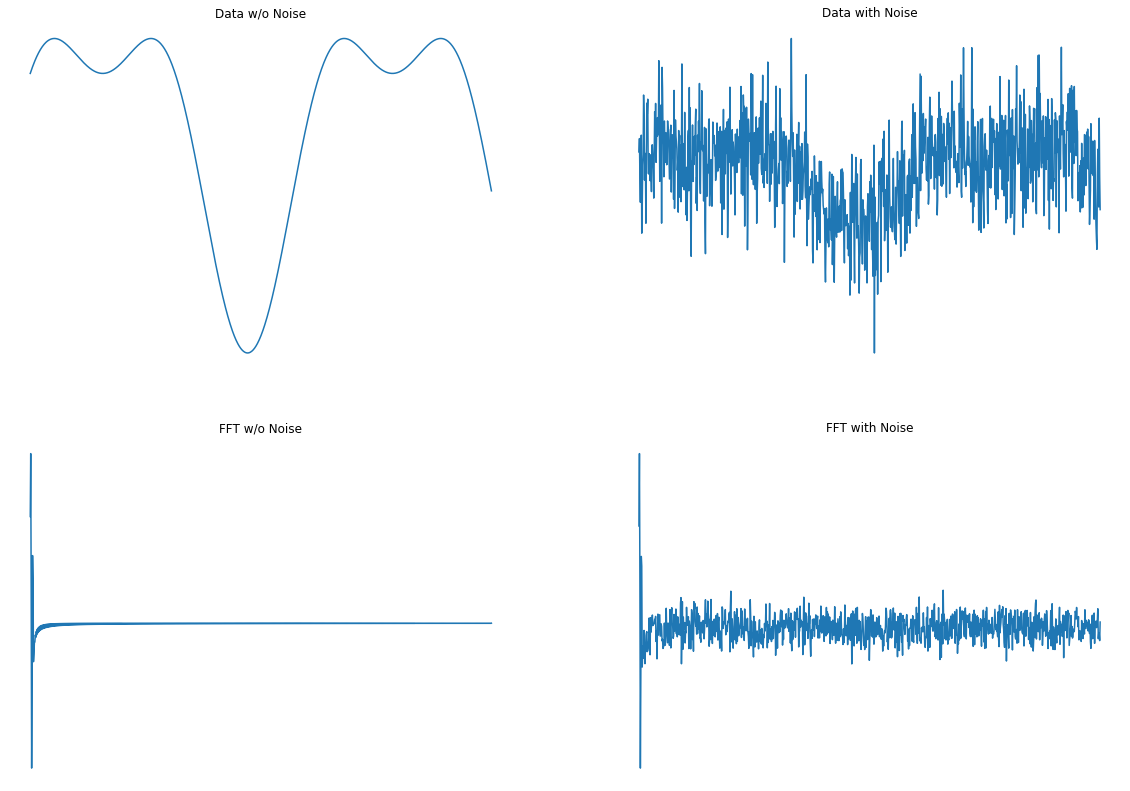

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import scipy.fftpack as fft
from ipywidgets import interact
%matplotlib inline


def f(x):
    return np.sin(x)+0.5*np.cos(2*x)

x_data=np.linspace(0,10,1000)
noise=rnd.randn(len(x_data))
y=f(x_data)
yn=f(x_data)+noise
yfft=fft.fft(y)
ynfft=fft.fft(yn)
ydiff=yfft-ynfft

fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize=(20, 14))


ax11.plot(y)
ax11.axis("off")
ax11.set_title("Data w/o Noise")

ax12.plot(yn)
ax12.axis("off")
ax12.set_title("Data with Noise")

ax21.plot(np.(yfft))
ax21.axis("off")
ax21.set_title("FFT w/o Noise")

ax22.plot(np.abs(ynfft))
ax22.axis("off")
ax22.set_title("FFT with Noise")


When we compare the two FFts, we see that they have the same two peaks at the beginning and the end of the graphs which corespondend to the sine and cosine wave

the noise in the middle of the FFT with noise comes..  well, from the noise

some may wonder why the ffts are mirrored, which is a special case which comes from using real valued data, which will be discussed later.


now in order to remove the noise we have to write a program, which sets all parts of the fft spectrum, whose amplitude is below a certain "cutoff amplitude" to zero, and transforms the changed spectrum back:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import scipy.fftpack as fft
from ipywidgets import interact
%matplotlib inline
def f(x):
    return np.sin(x)+0.5*np.cos(2*x)

x_data=np.linspace(0,10,1000)
noise=rnd.randn(len(x_data))
y=f(x_data)
yn=f(x_data)+noise
ynfft=fft.fft(yn)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))


ax1.plot(y)
ax1.axis("off")
ax1.set_title("Data w/o Noise")

plt.close()

def fourier(cut):
    ydnfft=np.copy(ynfft)
    for i in range(len(ydnfft)):
        if np.abs(ydnfft[i])<cut:
            ydnfft[i]=0
    #plt.plot(x_data, denoise_y)
    ydn=fft.ifft(ydnfft)
    ax2.clear()
    ax2.axis("off")
    ax2.set_title("Data with Noise removed")
    ax2.plot(ydn)
    return fig

interact(fourier, cut=(0.0, 100.0, 1))

interactive(children=(FloatSlider(value=50.0, description='cut', step=1.0), Output()), _dom_classes=('widget-i…

<function __main__.fourier(cut)>

In [ ]:



import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import scipy.fftpack as fft
from matplotlib.colors import LogNorm
from ipywidgets import interact

%matplotlib inline


img = plt.imread("moonlanding.png").astype(float)
img_fft = fft.fft2(img)

frac = 0.1
r, c = img_fft.shape
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize=(20, 14))
ax11.imshow(img, plt.cm.gray)
ax11.axis("off")
ax11.set_title("Original image")
ax12.imshow(np.abs(img_fft), norm=LogNorm(vmin=5))
ax12.set_title("Fourier transform")
fig.colorbar(
    ax12.imshow(np.abs(img_fft), norm=LogNorm(vmin=5)),
    ax=ax12,
    fraction=0.046,
    pad=0.04,
)
# initially define a colorbar instance, 
# so cutoff won't add it over an over again,
# but update its value
reduced_fft_colorbar = fig.colorbar(
        ax22.imshow(np.abs(img_fft), norm=LogNorm(vmin=5)),
        ax=ax22,
        fraction=0.046,
        pad=0.04,
    )
ax21.set_title("Reconstructed Image")
ax22.set_title("Reduced Fourier Transform")
# prevent plot from showing
plt.close()

def cutoff(frac):
    # use copy to not overwrite img_fft
    # like that there is no need to recalculate the fft
    img_coff = np.copy(img_fft)
    img_coff[int(r * frac) : int(r * (1 - frac))] = 0
    img_coff[:, int(c * frac) : int(c * (1 - frac))] = 0
    img_den = fft.ifft2(img_coff).real
    ax21.imshow(img_den, plt.cm.gray)
    # reset the shown image, since imshow stacks the data
    ax22.clear()
    reduced_fft_plt = ax22.imshow(np.abs(img_coff), norm=LogNorm(vmin=5))
    reduced_fft_colorbar.update_normal(reduced_fft_plt)
    return fig


interact(cutoff, frac=(0.01, 0.5, 0.01))